# Hekima - Data Visualization Test

**Author:** Leonardo Flores

**Email:** leonardocouy@hotmail.com

## Description
-----

A Python Script to analyse Pokemon Dataset and compare stats between pokemons

# Let's go?
-----

## First of all, import libraries that will be used

In [1]:
import pandas as pd
import numpy as np 
%matplotlib inline
import matplotlib.pyplot as plt

## Load dataset to memory and show DataFrame head.

In [2]:
file = "data/Pokemon.csv"
df = pd.read_csv(file)
df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


## Summary Statistics

In [3]:
df.describe()

,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,362.813750,435.10250,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,208.343798,119.96304,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,1.000000,180.00000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,184.750000,330.00000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,364.500000,450.00000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,539.250000,515.00000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,721.000000,780.00000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


## Talk is Cheap, show me the graphics!

###  Number of Pokemons By Generations

In [4]:
poke = df.groupby('Generation')["#"].count()
poke.to_frame()

,#
Generation,
1,166
2,106
3,160
4,121
5,165
6,82


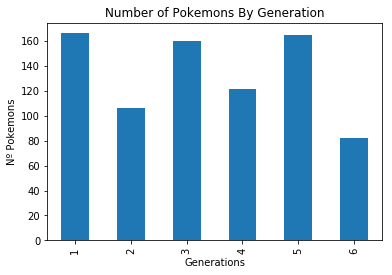

In [5]:
# PLOT!
poke.plot(title='Number of Pokemons By Generation', kind='bar')

# Change labels
plt.xlabel("Generations")
plt.ylabel("Nº Pokemons")

### Stats Comparison between Pokemons and Stats Overview about each one.

#### YAY!!! Useful during Battle!

Pokemons used in 1st example:

- Pikachu
- Bulbasaur

2st example

- Mewtwo
- Mew

### OK, Let's DRY (Don't Repeat Yourself) ? 
### First of all, we will create a function to return a dataframe with selected pokemons stats

In [6]:
# Select only this columns from DataFrame
columns = ['Name', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'HP', 'Speed']

def compare_pokemons(pokemon1_name, pokemon2_name):
    """Get selected pokemons and returns a dataframe with stats.
    
    Keyword arguments:
    pokemon1_name -- 1st pokemon name
    pokemon2_name -- 2nd pokemon name
    
    Returns:
    df_pkm -- Dataframe containing stats about selected pokemons
    """
    
    df_pkm = df[columns].loc[ (df['Name']== pokemon1_name) | (df['Name']== pokemon2_name) ]
    return df_pkm

### Now, we will create a function to plot a BAR CHART

In [7]:
# To a better understanding we will define sel_cols equals columns before (defined above) but, excluding NAME
sel_cols = columns[1:7]

def plot_comparison(pkm1, pkm2):
    """Plot a Comparison Bar Chart 
    
    Keyword arguments:
    pkm1 -- 1st Pokemon stats info
    pkm2 -- 2nd Pokemon stats info
    
    Result:
    plt.show() -- A bar chart will be show
    """
    
    # Configuring range and bars
    ind = np.arange(6) 
    width = 0.25      
    
    # Let's plot!
    fig = plt.figure(figsize=(12, 8))
    ax = fig.add_subplot(111)

    # [1:7] Positions in array excluding NAME (String)
    pkm1_bar = ax.bar(ind, pkm1[sel_cols], width, color='r') 
    pkm2_bar = ax.bar(ind + width, pkm2[sel_cols], width, color='b')  

    # Configuring texts and positions
    ax.set_ylabel('Power')
    ax.set_title('{pkm1_name} VS {pkm2_name}'.format(pkm1_name=pkm1.Name, pkm2_name=pkm2.Name), fontsize=20)
    ax.set_xticks(ind + width / 2)
    ax.set_xticklabels(columns[1:7]) # Exclude Name Field
    ax.legend((pkm1.Name, pkm2.Name))

    # PLOT!
    plt.show()

### And, create a function to plot a PIE CHART with stats and highlight the BEST STAT!

In [8]:
# To a better understanding we will define labels equals columns (defined above) but, excluding NAME
labels = columns[1:7]

def get_best_stat(pkm):
    """Get best stat about pokemon and returns info about best stat
    
    Keyword arguments:
    pkm -- Pokemon Stats Info
    
    Returns:
    dict(stat_name, stat_value, stat_position) -- returning stat_name, stat_value and stat position in array
    """
    
    # Get best stat name
    stat_name = pkm[labels].idxmax()

    # Get stat value
    stat_value = pkm[stat_name]
    
    # Get position in array
    # Keep a calm, this is a List Comprehension! and I use next to get the first value!
    stat_position = next(pos for pos in range(len(labels)) if labels[pos] == stat_name)

    return {'name': stat_name, 'value': stat_value, 'pos': stat_position}

def plot_pokemon_stats(pkm):
    """Plot a Pie Chart containing Stats about selected pokemon and highlights the best stat about this one.
    
    Keyword arguments:
    pkm -- Pokemon Stats Info
    
    Results:
    plt.show() -- A pie chart will be show
    """
    
    best_stat = get_best_stat(pkm)
    explode = [0, 0, 0, 0, 0, 0]
    
    # Update explode with best stat and will be highlighted!
    explode[best_stat['pos']] = 0.1
    
    # Let's PLOT!
    plt.pie(pkm[labels], explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
    plt.axis('equal')
    plt.title("{pkm_name} stats".format(pkm_name=pkm.Name), fontsize=20)
    plt.show()

### 1st example (Pikachu & Bulbasaur)

In [9]:
pkm1_name = 'Pikachu'
pkm2_name = 'Bulbasaur'
df_pkm = compare_pokemons(pkm1_name, pkm2_name)
df_pkm

,Name,Attack,Defense,Sp. Atk,Sp. Def,HP,Speed
0,Bulbasaur,49,49,65,65,45,45
30,Pikachu,55,40,50,50,35,90


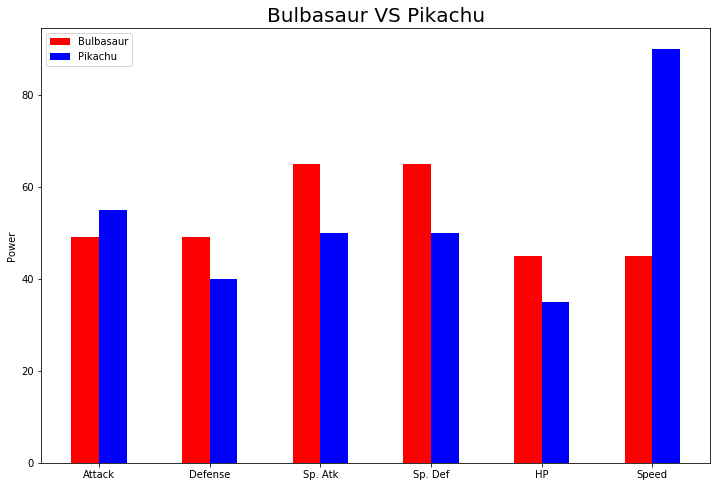

In [10]:
# Store pokemons stats in a list
pkm1 = df_pkm.iloc[0]
pkm2 = df_pkm.iloc[1]

# PLOT!
plot_comparison(pkm1, pkm2)

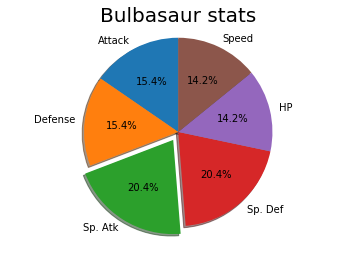

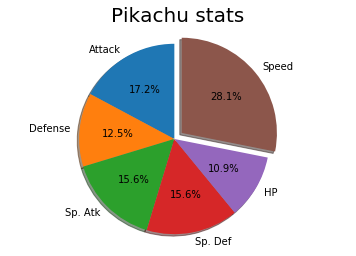

In [11]:
# Pie Chart
plot_pokemon_stats(pkm1)
plot_pokemon_stats(pkm2)

### 2nd Example

In [12]:
pkm1_name = 'Mewtwo'
pkm2_name = 'Mew'
df_pkm = compare_pokemons(pkm1_name, pkm2_name)
df_pkm

,Name,Attack,Defense,Sp. Atk,Sp. Def,HP,Speed
162,Mewtwo,110,90,154,90,106,130
165,Mew,100,100,100,100,100,100


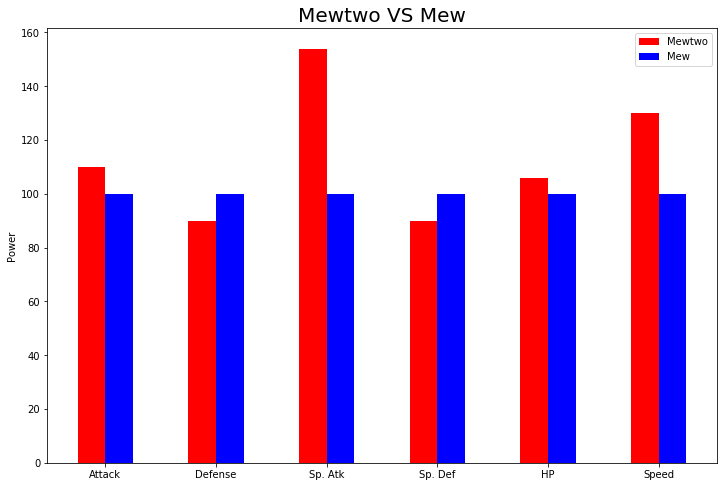

In [13]:
# Store pokemons stats in a list
pkm1 = df_pkm.iloc[0]
pkm2 = df_pkm.iloc[1]

# PLOT!
plot_comparison(pkm1, pkm2)

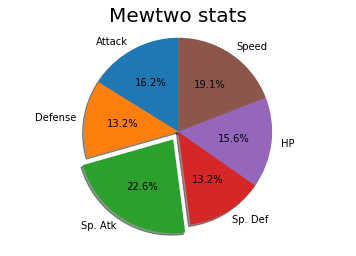

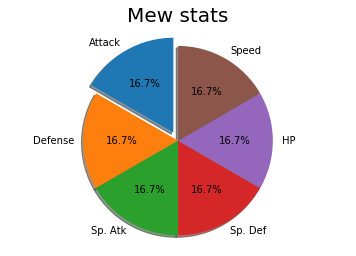

In [14]:
# Pie Chart
plot_pokemon_stats(pkm1)
plot_pokemon_stats(pkm2)

---

# Do you like? Star this repo, fork and contribute! 

### Let's learn together :)

# About me

- **Name:** Leonardo Flores
- **Email:** leonardocouy@hotmail.com
- **LinkedIn:** https://www.linkedin.com/in/leonardocouy/

